# Calculate air-sea fluxes
This builds on `cm26_combine_filter_inputs.ipynb`


In [1]:
# !mamba install aerobulk-python -y

In [2]:
# !pip install -e /home/jovyan/PROJECTS/scale-aware-air-sea

In [3]:
import json
import gcsfs
import xarray as xr
from aerobulk import noskin

import matplotlib.pyplot as plt
import numpy as np
import os
import dask
from scale_aware_air_sea.utils import to_zarr_split
from scale_aware_air_sea.cm26_utils import load_and_combine_cm26

fs = gcsfs.GCSFileSystem()

version = 'v0.5'
# suffix = '_test'
suffix = ''
# set up save targets
bucket = 'gs://leap-persistent/jbusecke'
smoothed_path = f"{bucket}/scale-aware-air-sea/smoothed/CM26_smoothed_{version}{suffix}.zarr"
smoothed_mapper = fs.get_mapper(smoothed_path)
output_path = f"{bucket}/scale-aware-air-sea/results/CM26_fluxes_{version}{suffix}.zarr"
output_mapper = fs.get_mapper(output_path)

In [4]:
ds = xr.open_dataset(
    smoothed_mapper,
    engine='zarr',
    chunks = {},
    consolidated=True,
    inline_array=True
)
ds

<xarray.Dataset>
Dimensions:                         (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time                            (time) object 0181-01-01 12:00:00 ... 020...
  * xt_ocean                        (xt_ocean) float64 -279.9 -279.8 ... 79.95
  * yt_ocean                        (yt_ocean) float64 -81.11 -81.07 ... 89.98
Data variables:
    q_ref_smoothed                  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    slp_smoothed                    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp_smoothed           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref_smoothed                  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative_smoothed             (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative_smoothed_atmos_only  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative_smoothed_ocean_only  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative_smoothed             (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative_smoothed_atmos_only  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative_smoothed_ocean_only  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [5]:
ds_original = load_and_combine_cm26(fs, inline_array=True)
ds_original

Load Data
Align in time
Interpolating ocean velocities
Regrid Atmospheric Data
Modify units
Mask nans
Calculate relative wind


<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [6]:
ds = xr.merge([ds, ds_original], join='inner')
ds

<xarray.Dataset>
Dimensions:                         (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time                            (time) object 0181-01-01 12:00:00 ... 020...
  * xt_ocean                        (xt_ocean) float64 -279.9 -279.8 ... 79.95
  * yt_ocean                        (yt_ocean) float64 -81.11 -81.07 ... 89.98
Data variables: (12/21)
    q_ref_smoothed                  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    slp_smoothed                    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp_smoothed           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref_smoothed                  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative_smoothed             (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative_smoothed_atmos_only  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    ...                              ...
    wind                            (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp                    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean                         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean                         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative                      (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative                      (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [7]:
def compute_fluxes(
    ds,
    algo,
    method,
    sst_name = 'surface_temp',
    t_name = 't_ref',
    q_name = 'q_ref',
    u_name = 'u_relative',
    v_name = 'v_relative',
    slp_name = 'slp',
    skin_correction = False
):
    # input dependent on method
    if method == 'smooth_tracer':
        sst = ds[sst_name+'_smoothed']
        t = ds[t_name+'_smoothed']
        q = ds[q_name+'_smoothed']
        u = ds[u_name]
        v = ds[v_name]
        slp = ds[slp_name+'_smoothed']
    elif method == 'smooth_vel':
        sst = ds[sst_name]
        t = ds[t_name]
        q = ds[q_name]
        u = ds[u_name+'_smoothed']
        v = ds[v_name+'_smoothed']
        slp = ds[slp_name]
    elif method == 'smooth_vel_tracer_atmos':
        sst = ds[sst_name]
        t = ds[t_name+'_smoothed']
        q = ds[q_name+'_smoothed']
        u = ds[u_name+'_smoothed_atmos_only']
        v = ds[v_name+'_smoothed_atmos_only']
        slp = ds[slp_name+'_smoothed']
    elif method == 'smooth_vel_tracer_ocean':
        sst = ds[sst_name+'_smoothed']
        t = ds[t_name]
        q = ds[q_name]
        u = ds[u_name+'_smoothed_ocean_only']
        v = ds[v_name+'_smoothed_ocean_only']
        slp = ds[slp_name]
    elif method == 'smooth_vel_ocean':
        sst = ds[sst_name]
        t = ds[t_name]
        q = ds[q_name]
        u = ds[u_name+'_smoothed_ocean_only']
        v = ds[v_name+'_smoothed_ocean_only']
        slp = ds[slp_name]
    elif method == 'smooth_all':
        sst = ds[sst_name+'_smoothed']
        t = ds[t_name+'_smoothed']
        q = ds[q_name+'_smoothed']
        u = ds[u_name+'_smoothed']
        v = ds[v_name+'_smoothed']
        slp = ds[slp_name+'_smoothed']
    elif method == 'smooth_none':
        sst = ds[sst_name]
        t = ds[t_name]
        q = ds[q_name]
        u = ds[u_name]
        v = ds[v_name]
        slp = ds[slp_name]
    else:
        raise ValueError(f'`method`{method} not recognized')
        
    # if skin_correction:
    #     func = noskin
    
    ds_out = xr.Dataset()
    (
        ds_out['ql'],
        ds_out['qh'],
        ds_out['taux'],
        ds_out['tauy'],
        ds_out['evap']
    ) =  noskin(
        sst,
        t,
        q,
        u,
        v,
        slp=slp,
        algo=algo,
        zt=2,
        zu=10,
        input_range_check=False
    )
    return ds_out

In [8]:
datasets = []
for (algo, skin_correction) in [
    ('ncar', False), 
    ('ecmwf', False), 
    # ('coare3p0', False), 
    ('coare3p6', False), 
    # ('andreas', False)
]:
    algo_datasets = []
    for method in [
        'smooth_full', 'smooth_tracer',
        'smooth_vel', 'smooth_vel_ocean',
        'smooth_vel_tracer_ocean',
        'smooth_vel_tracer_atmos', 'smooth_all'
    ]:
        ds_method = compute_fluxes(ds, algo, method)
        ds_method = ds_method.assign_coords(smoothing=method)
        algo_datasets.append(ds_method)
    ds_algo = xr.concat(algo_datasets, dim='smoothing')
    ds_algo = ds_algo.assign_coords({'algo':f"{algo}{'_'+skin if skin_correction else ''}"})
    datasets.append(ds_algo)
ds_full = xr.concat(datasets, dim='algo')
ds_full

,Array,Chunk
Bytes,5.42 TiB,111.24 MiB
Shape,"(3, 7, 7305, 2700, 3600)","(1, 1, 3, 2700, 3600)"
Count,169 Graph Layers,51135 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,5.42 TiB,111.24 MiB
Shape,"(3, 7, 7305, 2700, 3600)","(1, 1, 3, 2700, 3600)"
Count,169 Graph Layers,51135 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [9]:
roi = dict(xt_ocean=slice(-85, -75), yt_ocean=slice(20,30))

In [10]:
test = ds_full.ql.isel(time=-10, algo=0).sel(smoothing='smooth_full').sel(**roi).load()

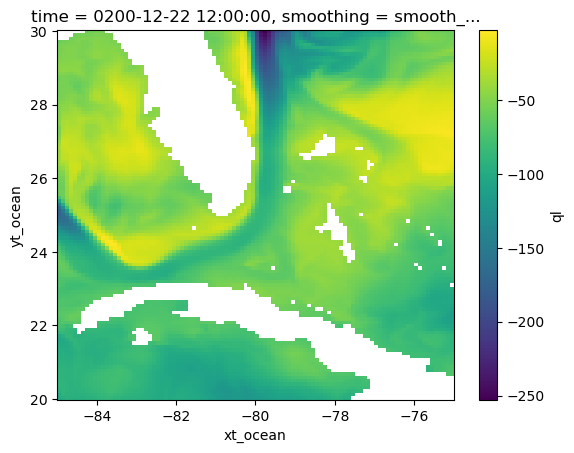

In [11]:
test.plot()

In [12]:
import subprocess
import logging
from distributed import WorkerPlugin

class MambaPlugin(WorkerPlugin):
    """
    Install packages on a worker as it starts up.

    Parameters
    ----------
    packages : List[str]
        A list of packages to install with pip on startup.
    """
    def __init__(self, packages):
        self.packages = packages

    def setup(self, worker):
        logger = logging.getLogger("distributed.worker")
        subprocess.call(['mamba', 'install'] + self.packages)
        logger.info("Installed %s", self.packages)

from dask_gateway import Gateway
gateway = Gateway()

# close existing clusters
open_clusters = gateway.list_clusters()
print(list(open_clusters))
if len(open_clusters)>0:
    for c in open_clusters:
        cluster = gateway.connect(c.name)
        cluster.shutdown()  

options = gateway.cluster_options()
options.worker_memory = 52
# options.worker_cores = 6
options.worker_cores = 9 #10 would lead to some spilling)

options.environment = dict(
    DASK_DISTRIBUTED__SCHEDULER__WORKER_SATURATION="1.0"
)

# Create a cluster with those options
cluster = gateway.new_cluster(options)
client = cluster.get_client()

plugin = MambaPlugin(['aerobulk-python'])
client.register_worker_plugin(plugin)
# cluster.adapt(10, 200)
cluster.scale(200)
client

[ClusterReport<name=prod.a754acdb758f4ae09a8170a0808aee78, status=RUNNING>]


/srv/conda/envs/notebook/lib/python3.9/site-packages/distributed/client.py:1309: VersionMismatchWarning: Mismatched versions found

+---------+----------------+----------------+---------+
| Package | Client         | Scheduler      | Workers |
+---------+----------------+----------------+---------+
| python  | 3.9.15.final.0 | 3.9.13.final.0 | None    |
+---------+----------------+----------------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /services/dask-gateway/clusters/prod.2e1cba57113f49efb3bc202a039b061c/status,


In [14]:
# if output_mapper.fs.exists(output_mapper.root):
#     print(f'removing {output_mapper.root}')
#     output_mapper.fs.rm(output_mapper.root, recursive=True)

removing leap-persistent/jbusecke/scale-aware-air-sea/results/CM26_fluxes_v0.5.zarr


In [ ]:
ds_save = ds_full#.isel(time=slice(0, 12))

# i cannot get this to run without endless retries at the very end...soooo frustrating
# ds_save.to_zarr(output_mapper, consolidated=True, mode='w')

# so lets go back to this
# to_zarr_split(ds_save, output_mapper, split_interval=200)
to_zarr_split(ds_save, output_mapper, split_interval=500)

Writing to leap-persistent/jbusecke/scale-aware-air-sea/results/CM26_fluxes_v0.5.zarr ...


  0%|          | 0/14 [00:00<?, ?it/s]

In [20]:
xr.open_dataset(output_mapper, engine='zarr', chunks={}, consolidated=True)

,Array,Chunk
Bytes,5.42 TiB,111.24 MiB
Shape,"(3, 7, 7305, 2700, 3600)","(1, 1, 3, 2700, 3600)"
Count,2 Graph Layers,51135 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,5.42 TiB,111.24 MiB
Shape,"(3, 7, 7305, 2700, 3600)","(1, 1, 3, 2700, 3600)"
Count,2 Graph Layers,51135 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [21]:
print('hello')

hello


# Plots

In [ ]:
ds_sample = xr.open_dataset(output_mapper, engine='zarr', chunks={}, consolidated=True)

In [ ]:
ds_sample['ql'].isel(algo=0, time=0).plot(col='smoothing')